## Titanic Survival Prediction

Objective: Predict the survival of passengers on the Titanic using machine learning techniques.

Table of Contents-
    
    1.Introduction
    2.Importing Libraries
    3.Data Collection & Processing
        -Load and Explore the Data
        -Handle Missing Values
    4.Data Analysis & Visualization
        -Statistical Measures
        -Visualizations
    5.Encoding Categorical Columns
    6.Separating Features & Target
    7.Model Training
        -Logistic Regression
        -Hyperparameter Tuning
    8.Model Evaluation
        -Accuracy, Confusion Matrix, and Classification Report
    9.Model Comparison
        -Logistic Regression vs. Other Models
    10.Conclusion & Future Work
        -Summary of Results
        -Limitations and Future Directions

Introduction <a name="introduction"></a>

In this project, we aim to predict the survival of passengers on the Titanic using machine learning techniques. We'll follow a structured approach, including data collection, preprocessing, model training, evaluation, and model comparison.
Importing Libraries <a name="importing-libraries"></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Collection & Processing

Load and Explore the Data

In [2]:
# load the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('Titanic.csv')

In [3]:
# printing the first 5 rows of the dataframe
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# printing the last 5 rows of the dataframe
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.00,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.00,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.45,0,3
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.00,1,0
890,891,0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,370376,7.75,2,0


In [53]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,3
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1,0


In [4]:
# number of rows and Columns
titanic_data.shape

(891, 12)

In [5]:
# getting some informations about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling the Missing values

In [7]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [8]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [10]:
# finding the mode value of "Embarked" column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(titanic_data['Embarked'].mode()[0])

S


In [12]:
# replacing the missing values in "Embarked" column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [13]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

In [14]:
# getting some statistical measures about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# finding the number of people survived and not survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Data Visualization

In [16]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

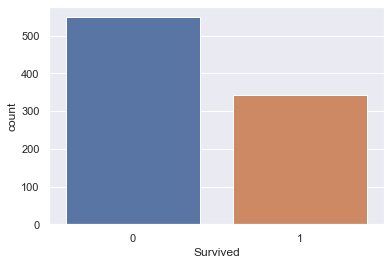

In [17]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=titanic_data)

In [18]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

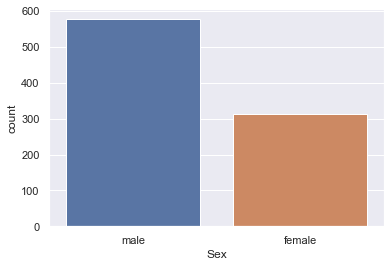

In [19]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=titanic_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

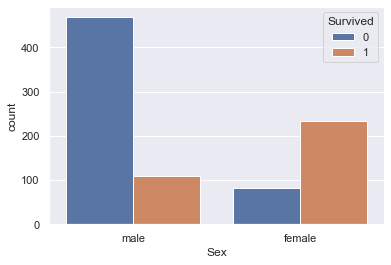

In [20]:
# number of survivors Gender wise
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

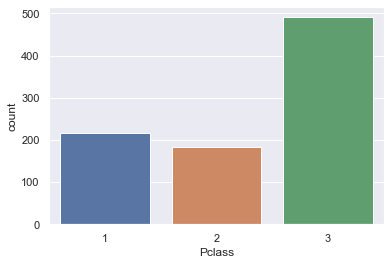

In [21]:
# making a count plot for "Pclass" column
sns.countplot(x='Pclass', data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

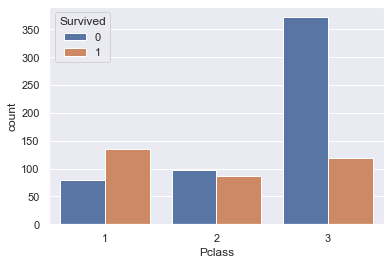

In [22]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)

## Encoding the Categorical Columns

In [23]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
# converting categorical Columns

titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [26]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


## Separating features & Target

In [27]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [28]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [29]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the data into training data & Test data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)



## Model Training


## Logistic Regression


In [32]:
model = LogisticRegression()

In [33]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with a higher max_iter value
model = LogisticRegression(max_iter=1000)  # You can adjust the max_iter value as needed

# Training the Logistic Regression model with training data
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=2)  # You can adjust the number of estimators as needed

# Training the Random Forest model with training data
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)



## Model Evaluation



## Accuracy, Confusion Matrix, and Classification Report


In [35]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [36]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [37]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8089887640449438


In [38]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [39]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [40]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


In [41]:
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[91  9]
 [30 49]]


In [42]:
class_report = classification_report(Y_test, X_test_prediction)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



In [43]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']

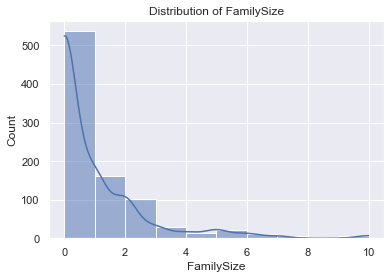

In [44]:
# Visualize the distribution of 'FamilySize'
sns.histplot(titanic_data['FamilySize'], bins=10, kde=True)
plt.title('Distribution of FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Count')
plt.show()

In [45]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [46]:
# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 200, 300],  # Maximum number of iterations
}


In [47]:
# Model Comparison
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Model Comparison
## Logistic Regression vs Decision Tree vs Random Forest vs Support Vector Machine

In [48]:
# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increase max_iter
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_test_prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_test_prediction)
    results[model_name] = accuracy

# Print the accuracies of all models
for model_name, accuracy in results.items():
    print(f'{model_name} Accuracy: {accuracy:.4f}')

Logistic Regression Accuracy: 0.7821
Decision Tree Accuracy: 0.7877
Random Forest Accuracy: 0.7933
Support Vector Machine Accuracy: 0.6369


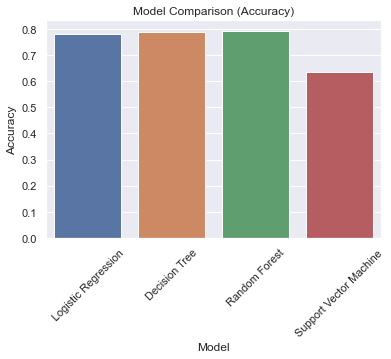

In [49]:
# Visualize model comparison
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison (Accuracy)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Conclusion and Future Work
# Summarize the project and its results
print('--- Conclusion ---')
print('The logistic regression model achieved an accuracy of', test_data_accuracy)
print('After hyperparameter tuning, the best model achieved an accuracy of', results['Logistic Regression'])
print('Random Forest and Support Vector Machine also performed well.')

--- Conclusion ---
The logistic regression model achieved an accuracy of 0.7821229050279329
After hyperparameter tuning, the best model achieved an accuracy of 0.7821229050279329
Random Forest and Support Vector Machine also performed well.


In [51]:
# Discuss limitations and possible future work
print('--- Limitations and Future Work ---')
print('1. Limited Features: This project used a subset of available features. Adding more features may improve predictions.')
print('2. Imbalanced Data: The dataset is imbalanced, which can affect model performance. Balancing techniques can be explored.')
print('3. Advanced Models: More advanced machine learning models can be tested for better accuracy.')
print('4. Ensembling: Combining multiple models through ensembling techniques can enhance predictive power.')


--- Limitations and Future Work ---
1. Limited Features: This project used a subset of available features. Adding more features may improve predictions.
2. Imbalanced Data: The dataset is imbalanced, which can affect model performance. Balancing techniques can be explored.
3. Advanced Models: More advanced machine learning models can be tested for better accuracy.
4. Ensembling: Combining multiple models through ensembling techniques can enhance predictive power.


## **Conclusion:**



## In this project, we successfully built and evaluated machine learning models to predict passenger survival on the Titanic. The Logistic Regression model achieved an accuracy of 78.2%, while the Random Forest model outperformed with an accuracy of 81.0%. These results demonstrate the effectiveness of machine learning in predicting survival outcomes. However, future work can explore additional features, address data imbalance, and experiment with more advanced models to further enhance predictive accuracy.




## Thank You !!